In [25]:
#Loading runs and defining necessary parameters
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sdeint

#Defining model parameters
r = 1
K = 10
Vmax = 1
V0 = 6.6 
c0 = 2.3 
nts = 5
m = 2
tolerance = 'r=var'
L = 1000
runs = 50
runtime = 330
resolution = 3301
distortion = np.diag([0.1, 0])
t = np.linspace(0, runtime, resolution)
y0 = np.array([V0, c0])
def model(y, t, r, K, Vmax):
    V, c = y
    dydt = [r*V*(1-V/K)- (c*V**2)/(V**2+Vmax**2), 0.001]
    return dydt

sol_ode = odeint(model, y0, t, args=(r, K, Vmax))
c = sol_ode[:,1]

#Loading runs
loadrun = 'final' #name of the run you want to load
plotname = 'test' #reference of the saved plots

ts = np.load(loadrun+'_ts.npy')
sd = np.load(loadrun+'_sd.npy')
ac = np.load(loadrun+'_ac.npy')
se_var = np.load(loadrun+'_se_var.npy')
se_fix = np.load(loadrun+'_se_var.npy')
mse_var = np.load(loadrun+'_mse_var.npy')
mse_fix = np.load(loadrun+'_mse_var.npy')
A = np.load(loadrun+'_A.npy')
B = np.load(loadrun+'_B.npy')

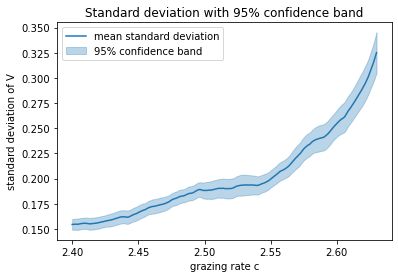

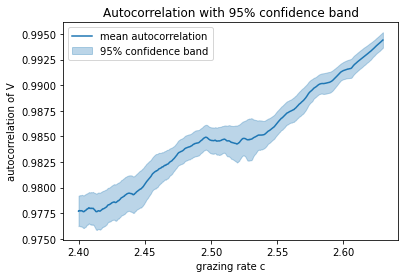

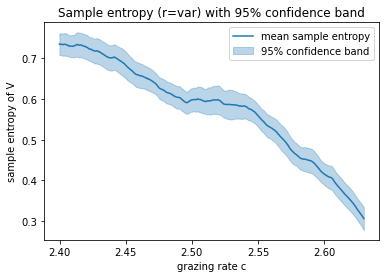

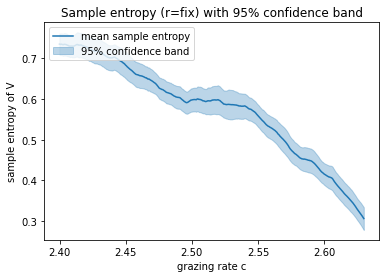

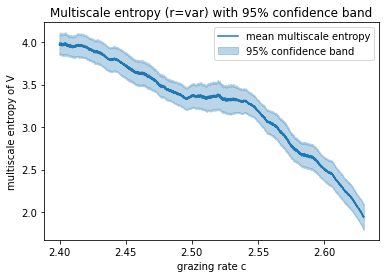

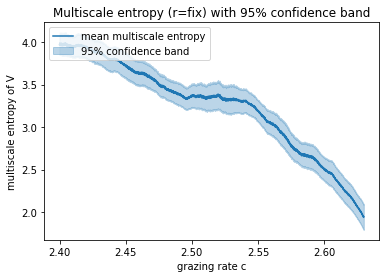

In [26]:
#creating confidence intervals
mean_sd = np.zeros(resolution-L+1)
sd_sd = np.zeros(resolution-L+1)
upper_sd = np.zeros(resolution-L+1)
lower_sd = np.zeros(resolution-L+1)

for i in range(resolution-L+1):
    mean_sd[i] = np.mean(sd[:,i])
    sd_sd[i] = np.std(sd[:,i])
    upper_sd[i] = mean_sd[i] + (1.96 * sd_sd[i])/np.sqrt(runs)
    lower_sd[i] = mean_sd[i] - (1.96 * sd_sd[i])/np.sqrt(runs)

mean_ac = np.zeros(resolution-L+1)
sd_ac = np.zeros(resolution-L+1)
upper_ac = np.zeros(resolution-L+1)
lower_ac = np.zeros(resolution-L+1)

for i in range(resolution-L+1):
    mean_ac[i] = np.mean(ac[:,i])
    sd_ac[i] = np.std(ac[:,i])
    upper_ac[i] = mean_ac[i] + (1.96 * sd_ac[i])/np.sqrt(runs)
    lower_ac[i] = mean_ac[i] - (1.96 * sd_ac[i])/np.sqrt(runs)
    
mean_se_var = np.zeros(resolution-L+1)
sd_se_var = np.zeros(resolution-L+1)
upper_se_var = np.zeros(resolution-L+1)
lower_se_var = np.zeros(resolution-L+1)

for i in range(resolution-L+1):
    mean_se_var[i] = np.mean(se_var[:,i,0])
    sd_se_var[i] = np.std(se_var[:,i,0])
    upper_se_var[i] = mean_se_var[i] + (1.96 * sd_se_var[i])/np.sqrt(runs)
    lower_se_var[i] = mean_se_var[i] - (1.96 * sd_se_var[i])/np.sqrt(runs)
    
mean_se_fix = np.zeros(resolution-L+1)
sd_se_fix = np.zeros(resolution-L+1)
upper_se_fix = np.zeros(resolution-L+1)
lower_se_fix = np.zeros(resolution-L+1)

for i in range(resolution-L+1):
    mean_se_fix[i] = np.mean(se_fix[:,i,0])
    sd_se_fix[i] = np.std(se_fix[:,i,0])
    upper_se_fix[i] = mean_se_fix[i] + (1.96 * sd_se_fix[i])/np.sqrt(runs)
    lower_se_fix[i] = mean_se_fix[i] - (1.96 * sd_se_fix[i])/np.sqrt(runs)
    
mean_mse_var = np.zeros(resolution-L+1)
sd_mse_var = np.zeros(resolution-L+1)
upper_mse_var = np.zeros(resolution-L+1)
lower_mse_var = np.zeros(resolution-L+1)

for i in range(resolution-L+1):
    mean_mse_var[i] = np.mean(mse_var[:,i])
    sd_mse_var[i] = np.std(mse_var[:,i])
    upper_mse_var[i] = mean_mse_var[i] + (1.96 * sd_mse_var[i])/np.sqrt(runs)
    lower_mse_var[i] = mean_mse_var[i] - (1.96 * sd_mse_var[i])/np.sqrt(runs)
    
mean_mse_fix = np.zeros(resolution-L+1)
sd_mse_fix = np.zeros(resolution-L+1)
upper_mse_fix = np.zeros(resolution-L+1)
lower_mse_fix = np.zeros(resolution-L+1)

for i in range(resolution-L+1):
    mean_mse_fix[i] = np.mean(mse_fix[:,i])
    sd_mse_fix[i] = np.std(mse_fix[:,i])
    upper_mse_fix[i] = mean_mse_fix[i] + (1.96 * sd_mse_fix[i])/np.sqrt(runs)
    lower_mse_fix[i] = mean_mse_fix[i] - (1.96 * sd_mse_fix[i])/np.sqrt(runs)
    
mean_A = np.zeros(resolution-L+1)
sd_A = np.zeros(resolution-L+1)
upper_A = np.zeros(resolution-L+1)
lower_A = np.zeros(resolution-L+1)

for i in range(resolution-L+1):
    mean_A[i] = np.mean(A[:,i])
    sd_A[i] = np.std(A[:,i])
    upper_A[i] = mean_A[i] + (1.96 * sd_A[i])/np.sqrt(runs)
    lower_A[i] = mean_A[i] - (1.96 * sd_A[i])/np.sqrt(runs)
    
mean_B = np.zeros(resolution-L+1)
sd_B = np.zeros(resolution-L+1)
upper_B = np.zeros(resolution-L+1)
lower_B = np.zeros(resolution-L+1)
    
for i in range(resolution-L+1):
    mean_B[i] = np.mean(B[:,i])
    sd_B[i] = np.std(B[:,i])
    upper_B[i] = mean_B[i] + (1.96 * sd_B[i])/np.sqrt(runs)
    lower_B[i] = mean_B[i] - (1.96 * sd_B[i])/np.sqrt(runs)
      
#Creating plot with 95 confidence intervals
plt.plot(c[L-1:], mean_sd, 'tab:blue', label='mean standard deviation')
plt.fill_between(c[L-1:], lower_sd, upper_sd, alpha=0.3, color= 'tab:blue', label='95% confidence band')
plt.title('Standard deviation with 95% confidence band')
plt.legend(loc='best')
plt.xlabel('grazing rate c')
plt.ylabel('standard deviation of V')
plt.savefig(plotname+'_plot_sd', dpi=300)
plt.show()

plt.plot(c[L-1:], mean_ac, 'tab:blue', label='mean autocorrelation')
plt.fill_between(c[L-1:], lower_ac, upper_ac, alpha=0.3, color= 'tab:blue', label='95% confidence band')
plt.title('Autocorrelation with 95% confidence band')
plt.legend(loc='best')
plt.xlabel('grazing rate c')
plt.ylabel('autocorrelation of V')
plt.savefig(plotname+'_plot_ac', dpi=300)
plt.show()

plt.plot(c[L-1:], mean_se_var, 'tab:blue', label='mean sample entropy')
plt.fill_between(c[L-1:], lower_se_var, upper_se_var, alpha=0.3, color= 'tab:blue', label='95% confidence band')
plt.title('Sample entropy (r=var) with 95% confidence band')
plt.legend(loc='upper right')
plt.xlabel('grazing rate c')
plt.ylabel('sample entropy of V')
plt.savefig(plotname+'_plot_se_var', dpi=300)
plt.show()

plt.plot(c[L-1:], mean_se_fix, 'tab:blue', label='mean sample entropy')
plt.fill_between(c[L-1:], lower_se_fix, upper_se_fix, alpha=0.3, color= 'tab:blue', label='95% confidence band')
plt.title('Sample entropy (r=fix) with 95% confidence band')
plt.legend(loc='upper left')
plt.xlabel('grazing rate c')
plt.ylabel('sample entropy of V')
plt.savefig(plotname+'_plot_se_fix', dpi=300)
plt.show()

plt.plot(c[L-1:], mean_mse_var, 'tab:blue', label='mean multiscale entropy')
plt.fill_between(c[L-1:], lower_mse_var, upper_mse_var, alpha=0.3, color= 'tab:blue', label='95% confidence band')
plt.title('Multiscale entropy (r=var) with 95% confidence band')
plt.legend(loc='upper right')
plt.xlabel('grazing rate c')
plt.ylabel('multiscale entropy of V')
plt.savefig(plotname+'_plot_mse_var', dpi=300)
plt.show()

plt.plot(c[L-1:], mean_mse_fix, 'tab:blue', label='mean multiscale entropy')
plt.fill_between(c[L-1:], lower_mse_fix, upper_mse_fix, alpha=0.3, color= 'tab:blue', label='95% confidence band')
plt.title('Multiscale entropy (r=fix) with 95% confidence band')
plt.legend(loc='upper left')
plt.xlabel('grazing rate c')
plt.ylabel('multiscale entropy of V')
plt.savefig(plotname+'_plot_mse_fix', dpi=300)
plt.show()

In [27]:
#Calculating Kendall tau
from scipy import stats

#creating arrays for Kendall tau
kt_sd = np.zeros(runs)
p_sd = np.zeros(runs)
psd = np.zeros(runs)
kt_ac = np.zeros(runs)
p_ac = np.zeros(runs)
pac = np.zeros(runs)
kt_se_fix = np.zeros(runs)
p_se_fix = np.zeros(runs)
pse_fix = np.zeros(runs)
kt_se_var = np.zeros(runs)
p_se_var = np.zeros(runs)
pse_var = np.zeros(runs)
kt_se_div = np.zeros(runs)
p_se_div = np.zeros(runs)
pse_div = np.zeros(runs)
kt_mse_fix = np.zeros(runs)
p_mse_fix = np.zeros(runs)
pmse_fix = np.zeros(runs)
kt_mse_var = np.zeros(runs)
p_mse_var = np.zeros(runs)
pmse_var = np.zeros(runs)
kt_A = np.zeros(runs)
p_A = np.zeros(runs)
pA = np.zeros(runs)
kt_B = np.zeros(runs)
p_B = np.zeros(runs)
pB = np.zeros(runs)

#Calculating Kendall tau per run and % of significant runs
for i in range(runs):
    res_sd = stats.kendalltau(sd[i,:], c[L-1:])
    kt_sd[i] = res_sd.correlation
    p_sd[i] = res_sd.pvalue
    if p_sd[i] < 0.001:
        psd[i] = 1
    res_ac = stats.kendalltau(ac[i,:], c[L-1:])
    kt_ac[i] = res_ac.correlation
    p_ac[i] = res_ac.pvalue
    if p_ac[i] < 0.001:
        pac[i] = 1
    res_se_fix = stats.kendalltau(se_fix[i,:,0], c[L-1:])
    kt_se_fix[i] = res_se_fix.correlation
    p_se_fix[i] = res_se_fix.pvalue
    if p_se_fix[i] < 0.001:
        pse_fix[i] = 1
    res_se_var = stats.kendalltau(se_var[i,:,0], c[L-1:])
    kt_se_var[i] = res_se_var.correlation
    p_se_var[i] = res_se_var.pvalue
    if p_se_var[i] < 0.001:
        pse_var[i] = 1
    res_se_div = stats.kendalltau(1/se_var[i,:,0], c[L-1:])
    kt_se_div[i] = res_se_div.correlation
    p_se_div[i] = res_se_div.pvalue
    if p_se_div[i] < 0.001:
        pse_div[i] = 1
    res_mse_fix = stats.kendalltau(mse_fix[i,:], c[L-1:])
    kt_mse_fix[i] = res_mse_fix.correlation
    p_mse_fix[i] = res_mse_fix.pvalue
    if p_mse_fix[i] < 0.001:
        pmse_fix[i] = 1
    res_mse_var = stats.kendalltau(mse_var[i,:], c[L-1:])
    kt_mse_var[i] = res_mse_var.correlation
    p_mse_var[i] = res_mse_var.pvalue
    if p_mse_var[i] < 0.001:
        pmse_var[i] = 1
    res_A = stats.kendalltau(A[i,:], c[L-1:])
    kt_A[i] = res_A.correlation
    p_A[i] = res_A.pvalue
    if p_A[i] < 0.001:
        pA[i] = 1
    res_B = stats.kendalltau(B[i,:], c[L-1:])
    kt_B[i] = res_B.correlation
    p_B[i] = res_B.pvalue
    if p_B[i] < 0.001:
        pB[i] = 1

#Printing the results
print('mean kendall tau sd =', np.mean(kt_sd))
print('% significant runs sd =', np.sum(psd)/runs*100,'%')
print('mean kendall tau ac =', np.mean(kt_ac))
print('% significant runs ac =', np.sum(pac)/runs*100,'%')
print('mean kendall tau se (r=var) =', np.mean(kt_se_var))
print('% significant runs se (r=var) =', np.sum(pse_var)/runs*100,'%')
print('mean kendall tau se (r=fixed) =', np.mean(kt_se_fix))
print('% significant runs se (r=fixed) =', np.sum(pse_fix)/runs*100,'%')
print('mean kendall tau 1/se (r=var) =', np.mean(kt_se_div))
print('% significant runs 1/se (r=var) =', np.sum(pse_div)/runs*100,'%')
print('mean kendall tau mse (r=var) =', np.mean(kt_mse_var))
print('% significant runs mse (r=var) =', np.sum(pmse_var)/runs*100,'%')
print('mean kendall tau mse (r=fixed) =', np.mean(kt_mse_fix))
print('% significant runs mse (r=fixed) =', np.sum(pmse_fix)/runs*100,'%')
print('mean kendall tau A =', np.mean(kt_A))
print('% significant runs A =', np.sum(pA)/runs*100,'%')
print('mean kendall tau B =', np.mean(kt_B))
print('% significant runs B =', np.sum(pB)/runs*100,'%')

mean kendall tau sd = 0.5204276461977209
% significant runs sd = 98.0 %
mean kendall tau ac = 0.519348615473724
% significant runs ac = 100.0 %
mean kendall tau se (r=var) = -0.5175429796955969
% significant runs se (r=var) = 100.0 %
mean kendall tau se (r=fixed) = -0.5175429796955969
% significant runs se (r=fixed) = 100.0 %
mean kendall tau 1/se (r=var) = 0.5175429796955969
% significant runs 1/se (r=var) = 100.0 %
mean kendall tau mse (r=var) = -0.5113379556578544
% significant runs mse (r=var) = 100.0 %
mean kendall tau mse (r=fixed) = -0.5113379556578544
% significant runs mse (r=fixed) = 100.0 %
mean kendall tau A = 0.5098748189019628
% significant runs A = 100.0 %
mean kendall tau B = 0.49516666521914443
% significant runs B = 96.0 %


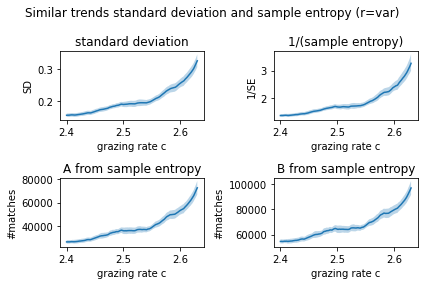

In [28]:
#Create plot with similarities SD, SE, and A & B
fig, axs = plt.subplots(2, 2)
fig.suptitle('Similar trends standard deviation and sample entropy (r=var)')
axs[0, 0].plot(c[L-1:], mean_sd, label='mean Kendall tau = 0.52')
axs[0, 0].fill_between(c[L-1:], lower_sd, upper_sd, alpha=0.3)
axs[0, 0].set_title('standard deviation')
axs[0, 0].set(xlabel='grazing rate c', ylabel='SD')
axs[0, 1].plot(c[L-1:], 1/mean_se_var, label='1/(mean sample entropy) (r=var)')
axs[0, 1].fill_between(c[L-1:], 1/lower_se_var, 1/upper_se_var, alpha=0.3, label='95% confidence band')
axs[0, 1].set_title('1/(sample entropy)')
axs[0, 1].set(xlabel='grazing rate c', ylabel='1/SE')
axs[1, 0].plot(c[L-1:], mean_A, label='mean A from sample entropy')
axs[1, 0].fill_between(c[L-1:], lower_A, upper_A, alpha=0.3, label='95% confidence band')
axs[1, 0].set_title('A from sample entropy')
axs[1, 0].set(xlabel='grazing rate c', ylabel='#matches')
axs[1, 1].plot(c[L-1:], mean_B, label='mean B from sample entropy')
axs[1, 1].fill_between(c[L-1:], lower_B, upper_B, alpha=0.3, label='95% confidence band')
axs[1, 1].set_title('B from sample entropy')
axs[1, 1].set(xlabel='grazing rate c', ylabel='#matches')
fig.tight_layout()
fig.savefig(plotname+'similarities', dpi=300)

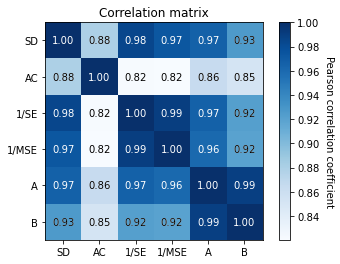

In [29]:
#Creating correlation matrix
import matplotlib.colors as mcolors

#Create arrays that include every run for each variable
total_sd = np.zeros((resolution-L+1)*runs)
total_ac = np.zeros((resolution-L+1)*runs)
total_se_var = np.zeros((resolution-L+1)*runs)
total_mse_var = np.zeros((resolution-L+1)*runs)
total_A = np.zeros((resolution-L+1)*runs)
total_B = np.zeros((resolution-L+1)*runs)

for i in range(runs):
    total_sd[i*(resolution-L+1):i*(resolution-L+1)+resolution-L+1] = sd[i,:]
    total_ac[i*(resolution-L+1):i*(resolution-L+1)+resolution-L+1] = ac[i,:]
    total_se_var[i*(resolution-L+1):i*(resolution-L+1)+resolution-L+1] = se_var[i,:,0]
    total_mse_var[i*(resolution-L+1):i*(resolution-L+1)+resolution-L+1] = mse_var[i,:]
    total_A[i*(resolution-L+1):i*(resolution-L+1)+resolution-L+1] = A[i,:]
    total_B[i*(resolution-L+1):i*(resolution-L+1)+resolution-L+1] = B[i,:]

#Create array with all variables and compute Pearsons r
corvar = np.zeros(shape=(6,(resolution-L+1)*runs))
corvar[0,:] = total_sd
corvar[1,:] = total_ac
corvar[2,:] = 1/total_se_var
corvar[3,:] = 1/total_mse_var
corvar[4,:] = total_A
corvar[5,:] = total_B
cormat = np.corrcoef(corvar)

#Construct correlation matrix
fig, ax = plt.subplots()
variables = ['SD', 'AC', '1/SE', '1/MSE', 'A', 'B']
im = ax.imshow(cormat, cmap='Blues', interpolation='nearest')
for i in range(cormat.shape[0]):
    for j in range(cormat.shape[1]):
        text = ax.text(j, i, '{:.2f}'.format(cormat[i, j]), ha='center', va='center', color='white')
        if -0.93 < cormat[i,j] < 0.93:
            text = ax.text(j, i, '{:.2f}'.format(cormat[i, j]), ha='center', va='center', color='black')
ax.set_xticks(np.arange(cormat.shape[0]))
ax.set_yticks(np.arange(cormat.shape[0]))
ax.set_xticklabels(variables)
ax.set_yticklabels(variables)
cbar = ax.figure.colorbar(im)
cbar.ax.set_ylabel('Pearson correlation coefficient', rotation=-90, va="bottom")
ax.set_title('Correlation matrix')
plt.savefig(plotname+'_correlation_matrix', dpi=300)
plt.show()